## Python Basic

In [1]:
a = 3
b = 2
a + b

5

In [2]:
a *10

30

## Python Data Science Project

In [32]:
import pandas
dfs = pandas.read_html('https://rate.bot.com.tw/xrt/quote/l6m/USD')

In [33]:
df = dfs[0]

In [34]:
df.head(3)

掛牌日期               幣別   現金匯率        Unnamed: 5_level_0  \
         掛牌日期      本行買入     幣別   本行賣出   本行買入               本行賣出   
0  2019/06/14  美金 (USD)  31.11  31.78  31.46              31.56   
1  2019/06/13  美金 (USD)  31.10  31.77  31.45              31.55   
2  2019/06/12  美金 (USD)  31.02  31.69  31.37              31.47   

                即期匯率                    Unnamed: 8_level_0  
  Unnamed: 6_level_1 Unnamed: 7_level_1 Unnamed: 8_level_1  
0                NaN                NaN                NaN  
1                NaN                NaN                NaN  
2                NaN                NaN                NaN

In [11]:
df = df[['掛牌日期','現金匯率']]

In [16]:
df.set_index(df['掛牌日期']['掛牌日期'], inplace=True)

Populating the interactive namespace from numpy and matplotlib


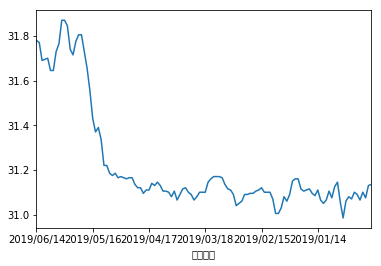

In [19]:
%pylab inline
df['現金匯率']['本行賣出'].plot(kind = 'line')

In [26]:
df2 = df['現金匯率']['本行賣出'].to_frame()

In [28]:
df2['mvg7'] = df2['本行賣出'].rolling(window = 7).mean()

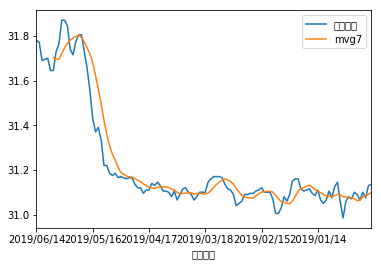

In [30]:
df2.plot(kind = 'line')

## 對話機器人

In [35]:
! pip install SpeechRecognition

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [36]:
! pip install pyaudio

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [38]:
import speech_recognition
r = speech_recognition.Recognizer()

with speech_recognition.Microphone() as source:
    r.adjust_for_ambient_noise(source)
    audio = r.listen(source)
r.recognize_google(audio, language='zh-TW')

'今天很高興來到全球人壽'

In [43]:
qa = {
   '早安': '你也早安',
    '我想買保險': '以下為你推薦全球人壽的精選保險',
    '我要買儲蓄險': '趕快買'
}


In [44]:
import speech_recognition


def listenTo():
    r = speech_recognition.Recognizer()

    with speech_recognition.Microphone() as source:
        r.adjust_for_ambient_noise(source)
        audio = r.listen(source)
    return r.recognize_google(audio, language='zh-TW')

In [48]:
qa.get(listenTo(), '我現在還不聰明，等我以後變聰明以後再告訴你答案')

'我現在還不聰明，等我以後變聰明以後再告訴你答案'

In [49]:
! pip install gTTS

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [50]:
! pip install pygame

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [51]:
from gtts import gTTS
from pygame import mixer
mixer.init()

import tempfile
def speak(sentence):
    with tempfile.NamedTemporaryFile(delete=True) as fp:
        tts = gTTS(text=sentence, lang='zh-tw')
        tts.save("{}.mp3".format(fp.name))
        mixer.music.load('{}.mp3'.format(fp.name))
        mixer.music.play()

In [52]:
speak('亂親阿翔')

In [54]:
speak(qa.get(listenTo(), '我現在還不聰明，等我以後變聰明以後再告訴你答案'))

## 資料蒐集

In [55]:
import requests
res = requests.get('https://rent.591.com.tw/?kind=1&region=1&section=5')

In [57]:
res

<Response [200]>

In [59]:
#res.text

In [60]:
import requests
url = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow=30&totalRows=804'
res = requests.get(url)
res.text

'<!DOCTYPE html>\n<html lang="en">\n    <head>\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n        <meta name="viewport" content="width=device-width, initial-scale=1">\n\n        <title>Page Expired</title>\n\n        <!-- Fonts -->\n        <link href="https://fonts.googleapis.com/css?family=Raleway:100,600" rel="stylesheet" type="text/css">\n\n        <!-- Styles -->\n        <style>\n            html, body {\n                background-color: #fff;\n                color: #636b6f;\n                font-family: \'Raleway\', sans-serif;\n                font-weight: 100;\n                height: 100vh;\n                margin: 0;\n            }\n\n            .full-height {\n                height: 100vh;\n            }\n\n            .flex-center {\n                align-items: center;\n                display: flex;\n                justify-content: center;\n            }\n\n            .position-ref {\n                position: re

In [64]:
import requests
from bs4 import BeautifulSoup
url = 'https://rent.591.com.tw/?kind=1&region=1&section=5'
rs = requests.session()
res = rs.get(url)
soup = BeautifulSoup(res.text, 'lxml')
token = soup.select_one('meta[name=csrf-token]')['content']

In [65]:
headers = {
'X-CSRF-TOKEN': token,
'X-Requested-With': 'XMLHttpRequest'
}

In [67]:
import requests
url = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow=30&totalRows=804'
res = rs.get(url, headers = headers)
#res.json()

In [70]:
import pandas
df = pandas.DataFrame(res.json()['data']['data'])
df.head()

,addInfo,addition2,addition3,addition4,addr_number_name,address,address_img,address_img_title,alley_name,allfloor,...,storeprice,street_name,streetid,type,unit,updatetime,user_id,vipBorder,vipimg,vipstyle
0,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,,安和路一段安和路名宅~安..,安和路名宅~安和首都山景101景觀豪邸,安和路名宅~安和首都山景101景觀豪邸,,16,...,0,安和路一段,25624,1,元/月,1560477725,710017,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip
1,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,18號,敦化南路161巷近忠孝敦化..,近忠孝敦化捷運，生活機能強,近忠孝敦化捷運，生活機能強,161巷,4,...,0,敦化南路,42066,1,元/月,1560074196,896502,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip
2,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,,敦化南路二段11巷保證最低..,保證最低價❤信義安和站❤管理美妝小資首選,保證最低價❤信義安和站❤管理美妝小資首選,11巷,6,...,0,敦化南路二段,25663,1,元/月,1560136681,208939,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip
3,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,,復興南路二段大安站旁❤採..,大安站旁❤採光亮管理24時❤美妝挑高空間,大安站旁❤採光亮管理24時❤美妝挑高空間,,11,...,0,復興南路二段,25661,1,元/月,1560138870,208939,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip
4,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,,忠孝東路四段170巷神旺後..,神旺後方精華地段●純住白天管理●鬧中取靜,神旺後方精華地段●純住白天管理●鬧中取靜,170巷,10,...,0,忠孝東路四段,25637,1,元/月,1560234882,1611062,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip


## 抓取林志玲圖片

In [71]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.google.com/search?ei=rRoDXd-0G8uwmAWl5KGIBw&rlz=1C5CHFA_enTW718TW718&yv=3&q=%E6%9E%97%E5%BF%97%E7%8E%B2&tbm=isch&vet=10ahUKEwifv8TuiejiAhVLGKYKHSVyCHEQuT0IWygB.rRoDXd-0G8uwmAWl5KGIBw.i&ved=0ahUKEwifv8TuiejiAhVLGKYKHSVyCHEQuT0IWygB&ijn=1&start=100&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc')
soup = BeautifulSoup(res.text, 'lxml')

In [75]:
for e in soup.select('img'):
    if e.get('src'):
        url = e.get('src')
        fname = url.split('tbn:')[1] + '.jpg'
        with open(fname, 'wb') as f:
            res2 = requests.get(url)
            f.write(res2.content)

## 抓取證交所資料

In [81]:
import requests
import time
for i in range(10):
    res  = requests.get('http://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date=&type=&_=1560492152256')
    print(res)
    time.sleep(3)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


## 資料清理

In [85]:
import requests
from bs4 import BeautifulSoup
url = 'https://rent.591.com.tw/?kind=1&region=1&section=5'
rs = requests.session()
res = rs.get(url)
soup = BeautifulSoup(res.text, 'lxml')
token = soup.select_one('meta[name=csrf-token]')['content']

In [86]:
import requests
headers = {
'X-CSRF-TOKEN': token,
'X-Requested-With': 'XMLHttpRequest'
}
url = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow=30&totalRows=804'
res = rs.get(url, headers = headers)
#res.json()

In [98]:
import pandas
df = pandas.DataFrame(res.json()['data']['data'])

In [99]:
df.head()

,addInfo,addition2,addition3,addition4,addr_number_name,address,address_img,address_img_title,alley_name,allfloor,...,storeprice,street_name,streetid,type,unit,updatetime,user_id,vipBorder,vipimg,vipstyle
0,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,,通化街175巷公寓1樓1+1..,"公寓1樓1+1房,設備齊全即可入住","公寓1樓1+1房,設備齊全即可入住",175巷,2,...,0,通化街,25657,1,元/月,1560255189,336250,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip
1,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,12號,羅斯福路二段77巷師..,師大運動場/捷運古亭站/35坪三房兩衛,師大運動場/捷運古亭站/35坪三房兩衛,77巷,5,...,0,羅斯福路二段,25679,1,元/月,1556730362,1475265,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip
2,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,,臥龍街麟光捷運，富陽公園..,麟光捷運，富陽公園優質住宅，大安硯,麟光捷運，富陽公園優質住宅，大安硯,,13,...,0,臥龍街,25640,1,元/月,1559883422,1307604,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip
3,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,,忠孝東路三段251巷忠孝復..,忠孝復興只要一分鐘,忠孝復興只要一分鐘,251巷,4,...,0,忠孝東路三段,25636,1,元/月,1559926715,2592722,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip
4,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,,忠孝東路四段170巷神旺後..,神旺後方精華地段●純住白天管理●鬧中取靜,神旺後方精華地段●純住白天管理●鬧中取靜,170巷,10,...,0,忠孝東路四段,25637,1,元/月,1560234882,1611062,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip


In [100]:
df = df[['address', 'floor', 'allfloor', 'layout','area', 'price', 'browsenum_all']]

In [101]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all
0,通化街175巷公寓1樓1+1..,1,2,2房1廳1衛,14.0,"15,000",2429
1,羅斯福路二段77巷師..,3,5,3房2廳2衛,35.0,"39,000",15433
2,臥龍街麟光捷運，富陽公園..,4,13,3房2廳1衛,28.0,"43,000",465
3,忠孝東路三段251巷忠孝復..,2,4,3房2廳2衛,27.0,"36,000",2567
4,忠孝東路四段170巷神旺後..,4,10,4房2廳2衛,47.8,"63,000",34


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
address          30 non-null object
floor            30 non-null int64
allfloor         30 non-null int64
layout           30 non-null object
area             30 non-null float64
price            30 non-null object
browsenum_all    30 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.7+ KB


In [104]:
s = '39,000'
int(s.replace(',', ''))

39000

In [109]:
def convertPrice(s):
    return int(s.replace(',', ''))
convertPrice('39,000')

39000

In [110]:
cp2 = lambda s: int(s.replace(',', ''))
cp2('39,000')

39000

In [107]:
df['price'] = df['price'].map(lambda s: int(s.replace(',', '')))

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
address          30 non-null object
floor            30 non-null int64
allfloor         30 non-null int64
layout           30 non-null object
area             30 non-null float64
price            30 non-null int64
browsenum_all    30 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.7+ KB


### 正規表達法

In [111]:
s = '0912345678'
'0912345678' in s

True

In [113]:
import re
s = 'w'

In [114]:
re.match('w', s)

<_sre.SRE_Match object; span=(0, 1), match='w'>

In [115]:
re.match('e', s)

In [116]:
# [] => 比對任意有出現在[]內的字元
re.match('[abcdefghijklmnopqrstuvwxyz]', s)

<_sre.SRE_Match object; span=(0, 1), match='w'>

In [118]:
# - => 連續
re.match('[a-z]', s)

<_sre.SRE_Match object; span=(0, 1), match='w'>

In [119]:
s = 'W'

In [120]:
re.match('[a-z]', s)

In [121]:
re.match('[a-zA-Z]', s)

<_sre.SRE_Match object; span=(0, 1), match='W'>

In [122]:
n = '6'

In [124]:
re.match('[0-9]', n)

<_sre.SRE_Match object; span=(0, 1), match='6'>

In [125]:
# \d => 比對任意數字
# \w => 比對任意英數字
# .  => 比對任意字元

In [126]:
n = '3'
re.match('\d', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [127]:
s = 'y'
re.match('\w', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [129]:
s = '%'
re.match('.', s)

<_sre.SRE_Match object; span=(0, 1), match='%'>

In [130]:
s = 'apple'
re.match('\w', s)

<_sre.SRE_Match object; span=(0, 1), match='a'>

In [132]:
# {n} => 比對出現n個的符號 
re.match('\w{5}', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [133]:
# {m,n} => 比對出現至少m個的符號, 至多n個的符號
re.match('\w{3,8}', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [134]:
# {0,} => 比對出現0 個以上的符號
re.match('\w{0,}', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [135]:
# * => {0,} => 比對出現0 個以上的符號
re.match('\w*', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [136]:
# {1,} => 比對出現1 個以上的符號
re.match('\w{1,}', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [137]:
# + => {1,} => 比對出現1 個以上的符號
re.match('\w+', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [141]:
phones = ['0912345678','0912-345678','0912-345-678','09123456781203018092380285035']
for p in phones:
    #m = re.match('09\d{8}', p)
    #m = re.match('09\d{2}-{0,1}\d{3}-{0,1}\d{3}', p)
    
    #? => {0,1} =>  比對出現0個或1個的符號
    #m = re.match('09\d{2}-?\d{3}-?\d{3}', p)
    
    # ^ => 比對開始,  $=>比對結尾
    m = re.match('^09\d{2}-?\d{3}-?\d{3}$', p)
    print(m)

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 11), match='0912-345678'>
<_sre.SRE_Match object; span=(0, 12), match='0912-345-678'>
None


In [143]:
a = 'Z123456789'
# 包含Z 開頭的
m = re.match('^Z\d{9}', a)
#if not m

<_sre.SRE_Match object; span=(0, 10), match='Z123456789'>

In [144]:
a = 'Z123456789'
# 排除Z 開頭的
m = re.match('^[^Z]\d{9}', a)
m

In [148]:
df[['layout_bedroom', 'layout_livingroom', 'layout_bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')

In [153]:
df['address']

0     通化街175巷公寓1樓1+1..
1         羅斯福路二段77巷師..
2       臥龍街麟光捷運，富陽公園..
3      忠孝東路三段251巷忠孝復..
4      忠孝東路四段170巷神旺後..
5       復興南路一段捷運大安站/..
6      敦化南路二段24H管理正面..
7      四維路160巷遠企大樓對面..
8      光復南路外商主管親睞的75..
9       仁愛路四段保全管理四房●..
10        和平東路二段175巷..
11      大安路二段大安捷運站/建..
12     忠孝東路三段251巷忠興復..
13        通安街大安精美靜巷大三房
14      復興南路二段捷運大安站1..
15     安和路二段74巷漂亮安和電..
16      濟南路三段忠孝新生旁明三..
17     新生南路二段54巷大安公園..
18     忠孝東路四段77巷忠孝復興..
19      信義路二段*近中正纪念堂..
20     師大路135巷師大路小豪宅..
21      光復南路~世貿大樓~管理..
22     和平東路二段18巷優質學區..
23     金華街243巷東門捷運裝潢..
24      通化街,六張犁捷運站,光..
25      信義路二段國際酒店式公寓..
26      安和路一段首都花園漂亮2..
27     樂利路27巷台北市樂利路吉..
28     敦化南路161巷近忠孝敦化..
29        羅斯福路二段101巷..
Name: address, dtype: object

In [155]:
df['address'].str.extract('(.*?[路街]).*')

,0
0,通化街
1,羅斯福路
2,臥龍街
3,忠孝東路
4,忠孝東路
5,復興南路
6,敦化南路
7,四維路
8,光復南路
9,仁愛路


In [172]:
article = '''
蔡英文總統稍早透過臉書表示，「逃犯條例」有侵害人權的疑慮，香港政府應該認真看待抗爭的訴求，與人民對話與溝通，不應該倉促強行通過法案。「逃犯條例」同時也侵害中華民國主權，我們不會接受。任何人想要破壞台灣的主權和民主，或拿去做政治交換的籌碼，「只要蔡英文在，就不會得逞。」

香港「反送中」抗爭活動持續，有幾位香港學生今天到總統府陳情，蔡總統在臉書上表示，今天有好幾位香港學生來總統府陳情，她因為有公務行程，所以特別請總統府秘書長陳菊接待，向同學們表達她的關心，也聆聽學生的意見。

蔡總統說，「逃犯條例」有侵害人權的疑慮，香港政府應該認真看待抗爭的訴求，與人民對話與溝通，不應該倉促強行通過法案。「逃犯條例」同時也侵害中華民國主權，我們不會接受。我們也拒絕接受以修法為前提的個案移交。合作打擊犯罪，不能以侵害人權的法案為前提，我們不願成為惡法的幫兇。

蔡總統表示，香港的抗爭，帶給台灣人民最深刻的感受，就是「一國兩制」並不可行的，民主化的台灣不可能接受。身為總統，她最重要的責任，就是守護台灣的主權和民主，讓世世代代的台灣人擁有對未來的選擇權。

蔡總統說，「任何人想要破壞台灣的主權和民主，或拿去做政治交換的籌碼，只要蔡英文在，就不會得逞。」
'''

In [173]:
! pip install jieba

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [174]:
import jieba
jieba.add_word('警務佐')
list(jieba.cut(article))

['\n',
 '蔡英文',
 '總統',
 '稍早',
 '透過',
 '臉書',
 '表示',
 '，',
 '「',
 '逃犯',
 '條例',
 '」',
 '有',
 '侵害',
 '人權',
 '的',
 '疑慮',
 '，',
 '香港',
 '政府',
 '應該',
 '認真',
 '看待',
 '抗爭',
 '的',
 '訴求',
 '，',
 '與',
 '人民',
 '對話',
 '與',
 '溝通',
 '，',
 '不應該',
 '倉促',
 '強行',
 '通過',
 '法案',
 '。',
 '「',
 '逃犯',
 '條例',
 '」',
 '同時',
 '也',
 '侵害',
 '中華民國',
 '主權',
 '，',
 '我們',
 '不會',
 '接受',
 '。',
 '任何',
 '人',
 '想要',
 '破壞',
 '台灣',
 '的',
 '主權',
 '和',
 '民主',
 '，',
 '或',
 '拿去',
 '做',
 '政治',
 '交換',
 '的',
 '籌碼',
 '，',
 '「',
 '只要',
 '蔡英文',
 '在',
 '，',
 '就',
 '不會',
 '得逞',
 '。',
 '」',
 '\n',
 '\n',
 '香港',
 '「',
 '反送',
 '中',
 '」',
 '抗爭',
 '活動',
 '持續',
 '，',
 '有',
 '幾',
 '位',
 '香港',
 '學生',
 '今天',
 '到',
 '總統府',
 '陳情',
 '，',
 '蔡',
 '總統',
 '在',
 '臉書',
 '上',
 '表示',
 '，',
 '今天',
 '有',
 '好',
 '幾',
 '位',
 '香港',
 '學生',
 '來',
 '總統府',
 '陳情',
 '，',
 '她',
 '因為',
 '有',
 '公務',
 '行程',
 '，',
 '所以',
 '特別',
 '請',
 '總統府',
 '秘書長',
 '陳菊',
 '接待',
 '，',
 '向',
 '同學',
 '們',
 '表達',
 '她',
 '的',
 '關心',
 '，',
 '也',
 '聆聽',
 '學生',
 '的',
 '意見',
 '。',
 '\n',
 '\n',
 '蔡'

In [175]:
a ='''
陳，林，黃，張，李，王，吳，劉，蔡，楊，
許，鄭，謝，郭，洪，曾，邱，廖，賴，周，
徐，蘇，葉，莊，呂，江，何，蕭，羅，高，
簡，朱，鍾，施，游，詹，沈，彭，胡，余，
盧，潘，顏，梁，趙，柯，翁，魏，方，孫，
張簡，戴，范，歐陽，宋，鄧，杜，侯，曹，薛，
傅，丁，溫，紀，范姜，蔣，歐，藍，連，唐，
馬，董，石，卓，程，姚，康，馮，古，姜，
湯，汪，白，田，涂，鄒，巫，尤，鐘，龔，
嚴，韓，黎，阮，袁，童，陸，金，錢，邵。
'''
''.join([w.strip().strip('。') for w in a.split('，')])

'陳林黃張李王吳劉蔡楊許鄭謝郭洪曾邱廖賴周徐蘇葉莊呂江何蕭羅高簡朱鍾施游詹沈彭胡余盧潘顏梁趙柯翁魏方孫張簡戴范歐陽宋鄧杜侯曹薛傅丁溫紀范姜蔣歐藍連唐馬董石卓程姚康馮古姜湯汪白田涂鄒巫尤鐘龔嚴韓黎阮袁童陸金錢邵'

In [177]:
import jieba
for w in jieba.cut(article):
    m = re.match('[陳林黃張李王吳劉蔡楊許鄭謝郭洪曾邱廖賴周徐蘇葉莊呂江何蕭羅高簡朱鍾施游詹沈彭胡余盧潘顏梁趙柯翁魏方孫張簡戴范歐陽宋鄧杜侯曹薛傅丁溫紀范姜蔣歐藍連唐董石卓程姚康馮古姜湯汪白田涂鄒巫尤鐘龔嚴韓黎阮袁童陸錢邵][\u4e00-\u9fa5]{1,2}', w)
    if m:
        print(w)

蔡英文
蔡英文
陳情
陳情
陳菊
蔡英文


In [179]:
del df['layout']

In [180]:

df.head()

,address,floor,allfloor,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,通化街175巷公寓1樓1+1..,1,2,14.0,15000,2429,2,1,1
1,羅斯福路二段77巷師..,3,5,35.0,39000,15433,3,2,2
2,臥龍街麟光捷運，富陽公園..,4,13,28.0,43000,465,3,2,1
3,忠孝東路三段251巷忠孝復..,2,4,27.0,36000,2567,3,2,2
4,忠孝東路四段170巷神旺後..,4,10,47.8,63000,34,4,2,2
